In [34]:
import os
import json
import pytz
import math
from datetime import datetime, timedelta
import statsmodels.api as statsmodel
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

pst_tz = pytz.timezone('America/Los_Angeles')

In [2]:
### QUESTION 1


def calc_statistics(file_name):
    # define lists to store information
    num_retweets_list = []                 
    num_followers_list = []               
    num_tweets = 0                                            
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        if lineNum == 0 :
            start_time = eachTweet['citation_date']
            
        end_time = eachTweet['citation_date']
        
        # number of retweets of a tweets
        num_retweets_list.append(eachTweet['metrics']['citations']['total']) 
        # number of followers
        num_followers_list.append(eachTweet['author']['followers']) 
        # number of twitters
        num_tweets = num_tweets + 1
    
    # Calculation
    num_hours = np.ceil((end_time - start_time)/3600)   # math,ceil(15.0)=15, math.ceil(15.2)=16    
    num_retweets = np.sum(num_retweets_list)
    num_followers = np.sum(num_followers_list)
    
    avg_tweets_per_hour = num_tweets / num_hours
    avg_followers_per_tweet = num_followers / num_tweets
    avg_retweets_per_tweet = num_retweets / num_tweets
    
    print('Average number of tweets per hour is ', round(avg_tweets_per_hour,2))
    print('Average number of followers of users posting the tweets per tweet is ', round(avg_followers_per_tweet,2))
    print('Average number of retweets per tweet is ', round(avg_retweets_per_tweet,2))
    return avg_tweets_per_hour, avg_followers_per_tweet, avg_retweets_per_tweet


# Twitter Name
file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

# Run each files 
for i in file_names:
    print("%s :" % i)
    calc_statistics(i)

print("done!")

tweets_#gohawks.txt :
Average number of tweets per hour is  340.97
Average number of followers of users posting the tweets per tweet is  2217.92
Average number of retweets per tweet is  2.01
tweets_#gopatriots.txt :
Average number of tweets per hour is  41.47
Average number of followers of users posting the tweets per tweet is  1427.25
Average number of retweets per tweet is  1.41
tweets_#nfl.txt :
Average number of tweets per hour is  461.43
Average number of followers of users posting the tweets per tweet is  4662.38
Average number of retweets per tweet is  1.53
tweets_#patriots.txt :
Average number of tweets per hour is  759.69
Average number of followers of users posting the tweets per tweet is  3280.46
Average number of retweets per tweet is  1.79
tweets_#sb49.txt :
Average number of tweets per hour is  1275.56
Average number of followers of users posting the tweets per tweet is  10374.16
Average number of retweets per tweet is  2.53
tweets_#superbowl.txt :
Average number of tweet

<Figure size 432x288 with 0 Axes>

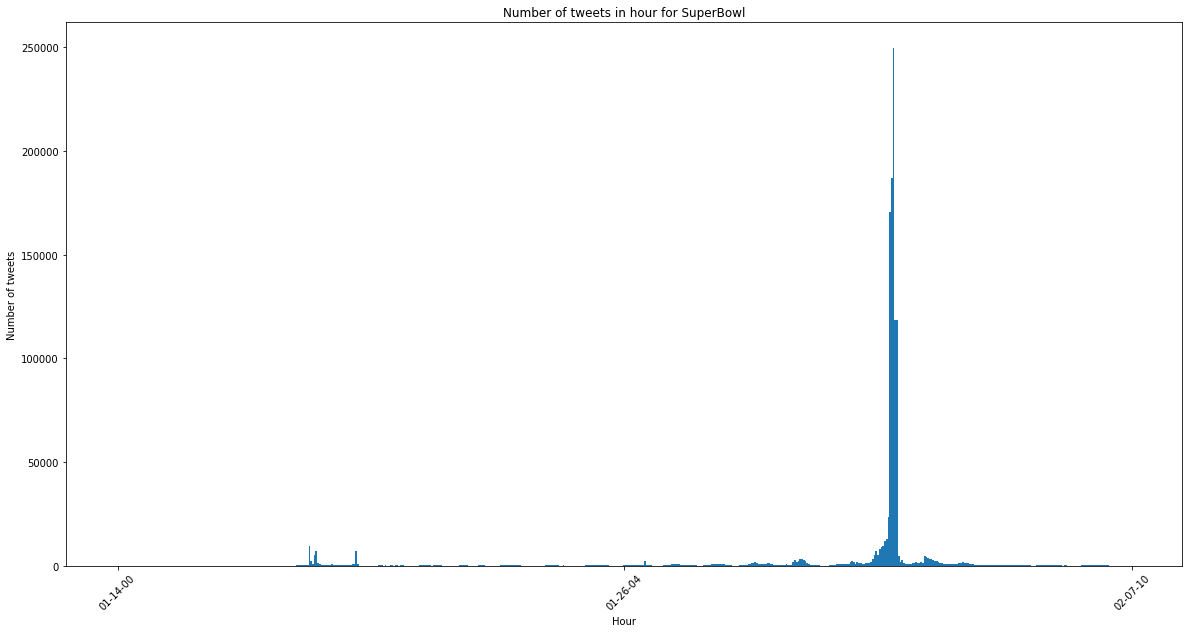

<Figure size 432x288 with 0 Axes>

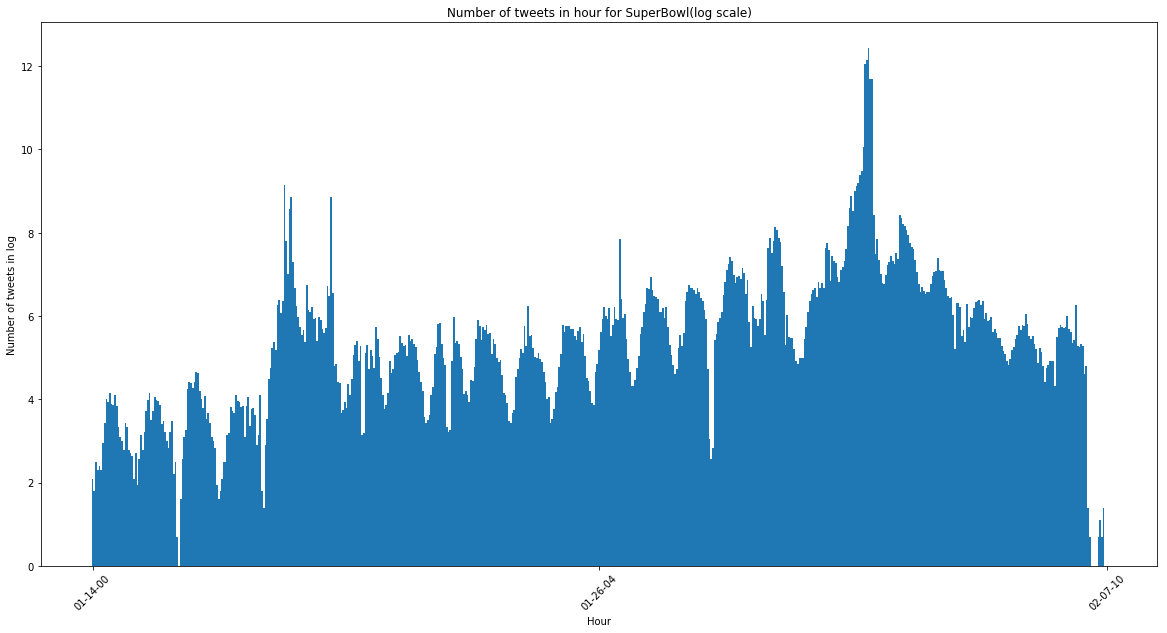

<Figure size 432x288 with 0 Axes>

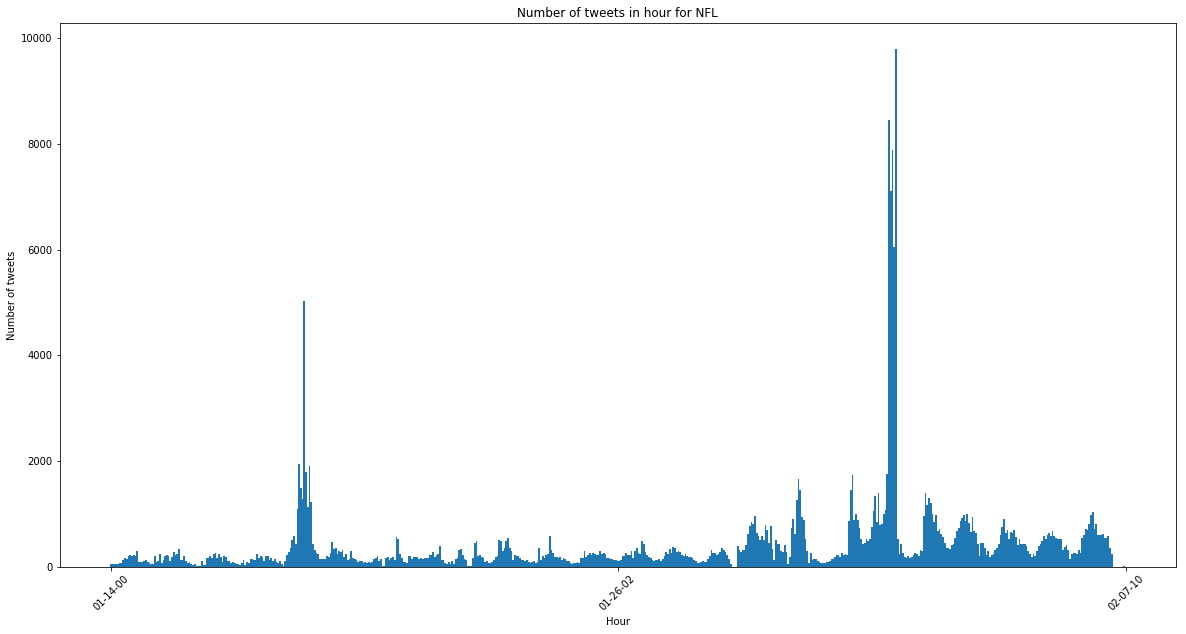

<Figure size 432x288 with 0 Axes>

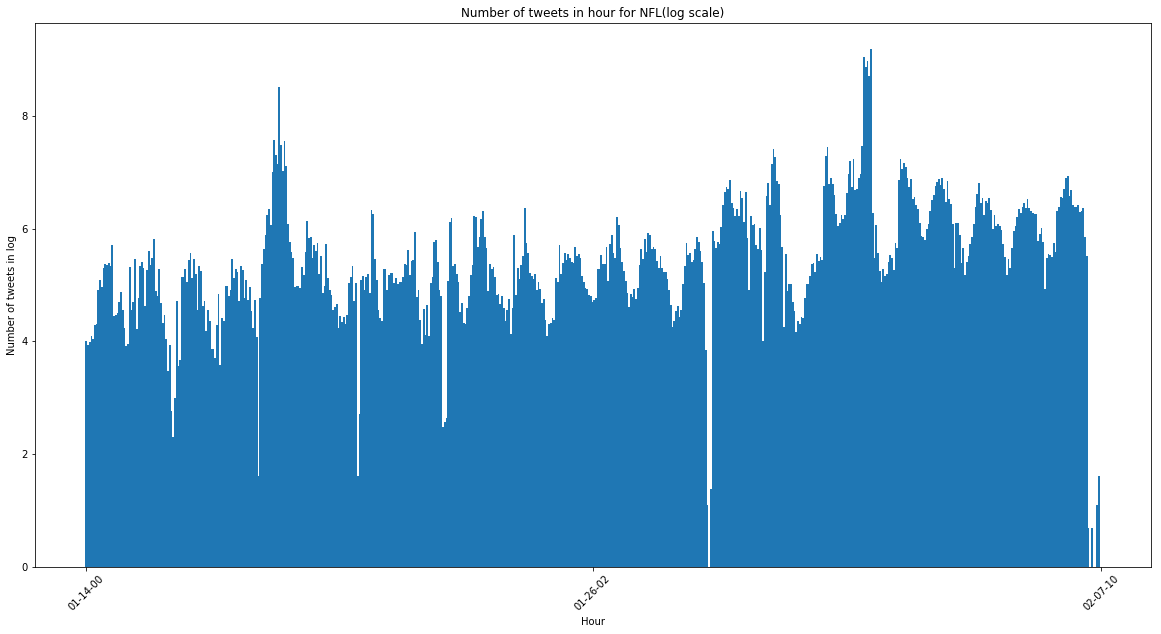

In [5]:
### QUESTION 2


def plot_num_tweets_per_hour(file_name, hashtag_name):  
    # Store the number of tweets in each hour
    hour_list = []
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hour_list.append(mdh)
        
        
    hour_list = np.unique(hour_list)
    # form a map, key: date, value: num of tweets
    hm_map = {i : 0 for i in hour_list}
        
    f = open(file_name, 'r', encoding = 'utf-8')

    for lineNum, line in enumerate(f) :
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hm_map[mdh] = hm_map[mdh] + 1   
    
    # plot the figure
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.bar(range(len(hour_list)), hm_map.values(), width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of tweets')
    plt.title(('Number of tweets in hour for ' + hashtag_name))
    plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.xticks(rotation=45) 
    plt.show()
    
    logNum = []
    for i in hm_map.values() :
        logNum.append(np.log(i))
    
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.bar(range(len(hour_list)), logNum, width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of tweets in log')
    plt.title(('Number of tweets in hour for ' + hashtag_name + '(log scale)'))
    plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.xticks(rotation=45) 
    plt.show()


# Plot the two figures
plot_num_tweets_per_hour('tweets_#superbowl.txt', 'SuperBowl')
plot_num_tweets_per_hour('tweets_#nfl.txt', 'NFL')

In [59]:
### QUESTION 3


def extract_five_features(file_name):
    
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        if lineNum == 0 :
            start_time = eachTweet['citation_date']  
        end_time = eachTweet['citation_date']
    
    # use start time and end time to calculate of the number total hours
    num_hours = math.ceil((end_time - start_time)/3600)   # math,ceil(15.0)=15, math.ceil(15.2)=16
    
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,5])
    
    # calculate the feature values in each hour
 
    for tweet_string in f.readlines() : 
        tweet = json.loads(tweet_string)
        hour_idx = int((tweet['citation_date'] - start_time)/3600)   # in which hour (in which index)
        print(hour_idx)
        hourly_features[hour_idx][0] += 1  # total number of tweets
        hourly_features[hour_idx][1] += tweet['metrics']['citations']['total']  # total number of retweets
        hourly_features[hour_idx][2] += tweet['author']['followers']  # total number of followers
        if tweet['author']['followers'] > hourly_features[hour_idx][3]:
            hourly_features[hour_idx][3] += tweet['author']['followers']  # maximum followers
        tweet_time_UNIX = tweet['citation_date'] 
        pst_tz = pytz.timezone('America/Los_Angeles')
        tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
        hourly_features[hour_idx][4] = tweet_time.hour  # hour
        
    return hourly_features

a = extract_five_features('tweets_#gohawks.txt')
print(a)

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_five_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict()
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    mse = metrics.mean_squared_error(y, y_pred)
    print('MSE value: ',mse)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
**************************************************
For  tweets_#gohawks.txt :
MSE value:  0.0
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2019   Prob (F-statistic):                nan
Time:                        21:00:08   Log-Likelihood:                    inf
No. Observations:                 495   AIC:                              -inf
Df Residuals:                     495   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                           

D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure

**************************************************
For  tweets_#gopatriots.txt :
MSE value:  0.0
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2019   Prob (F-statistic):                nan
Time:                        21:00:12   Log-Likelihood:                    inf
No. Observations:                 566   AIC:                              -inf
Df Residuals:                     566   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure

**************************************************
For  tweets_#nfl.txt :
MSE value:  0.0
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2019   Prob (F-statistic):                nan
Time:                        21:00:55   Log-Likelihood:                    inf
No. Observations:                 504   AIC:                              -inf
Df Residuals:                     504   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure

**************************************************
For  tweets_#patriots.txt :
MSE value:  0.0
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2019   Prob (F-statistic):                nan
Time:                        21:02:09   Log-Likelihood:                    inf
No. Observations:                 579   AIC:                              -inf
Df Residuals:                     579   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure

**************************************************
For  tweets_#sb49.txt :
MSE value:  0.0
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2019   Prob (F-statistic):                nan
Time:                        21:04:22   Log-Likelihood:                    inf
No. Observations:                 582   AIC:                              -inf
Df Residuals:                     582   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure

**************************************************
For  tweets_#superbowl.txt :
MSE value:  0.0
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2019   Prob (F-statistic):                nan
Time:                        21:08:00   Log-Likelihood:                    inf
No. Observations:                 517   AIC:                              -inf
Df Residuals:                     517   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
D:\Anaconda3\envs\python3.5\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\python3.5\lib\site-packages\scipy\stats\_distn_infrastructure

In [60]:
### QUESTION 4


# All features we want to explore

feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Total number of impressions',
                'Total number of momentum', 'Total number of favorite count', 'Total number of ranking score',
                'Total number of acceleration', 'Total number of replies', 'Total number of unique users',
                'Total number of unique authors', 'Total number of user mentions']

def extract_more_features(file_name):
    
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        if lineNum == 0 :
            start_time = eachTweet['citation_date']  
        end_time = eachTweet['citation_date']
        
    num_hours = math.ceil((end_time - start_time)/3600)   # math.ceil(15.0)=15, math.ceil(15.2)=16
    print(num_hours)
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,14])
    
    # define lists to store unique users and authors
    unique_user_list = []
    unique_author_list = []
    
    # calculate the feature values in each hour
    for tweet in f:
        hour_idx = int((tweet['citation_date'] - start_time)/3600)   # in which hour (in which index)
        hourly_features[hour_idx][0] += 1  # total number of tweets
        hourly_features[hour_idx][1] += tweet['metrics']['citations']['total']  # total number of retweets
        hourly_features[hour_idx][2] += tweet['author']['followers']  # total number of followers
        if tweet['author']['followers'] > hourly_features[hour_idx][3]:
            hourly_features[hour_idx][3] += tweet['author']['followers']  # maximum followers
        tweet_time_UNIX = tweet['citation_date'] 
        pst_tz = pytz.timezone('America/Los_Angeles')
        tweet_time = datetime.datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
        hourly_features[hour_idx][4] = tweet_time.hour  # hour
        hourly_features[hour_idx][5] += tweet['metrics']['impressions']
        hourly_features[hour_idx][6] += tweet['metrics']['momentum']
        hourly_features[hour_idx][7] += tweet['tweet']['favorite_count']
        hourly_features[hour_idx][8] += tweet['metrics']['ranking_score']
        hourly_features[hour_idx][9] += tweet['metrics']['acceleration']
        hourly_features[hour_idx][10] += tweet['metrics']['citations']['replies']
        if tweet['tweet']['user']['id'] not in unique_user_list:
            unique_user_list.append(tweet['tweet']['user']['id'])
            hourly_features[hour_idx][11] += 1
        if tweet['author']['name'] not in unique_author_list:
            unique_author_list.append(tweet['author']['name'])
            hourly_features[hour_idx][12] += 1
        hourly_features[hour_idx][13] += len(tweet['tweet']['entities']['user_mentions'])
        
    return hourly_features


file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_five_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict()
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    mse = metrics.mean_squared_error(y, y_pred)
    print('MSE value: ',mse)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

496
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
for file_name in file_names:
    # X_train & y
    X = extract_five_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict()
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    mse = metrics.mean_squared_error(y, y_pred)
    print('MSE value: ',mse)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

0
1
2
3
4
5
6
7
8
9


In [44]:
print(hourly_features)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
